In [2]:
import numpy as np # linear algebra
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, chi2_contingency

In [4]:
data = pd.read_csv("Sales_with_NaNs_v1.3.csv")


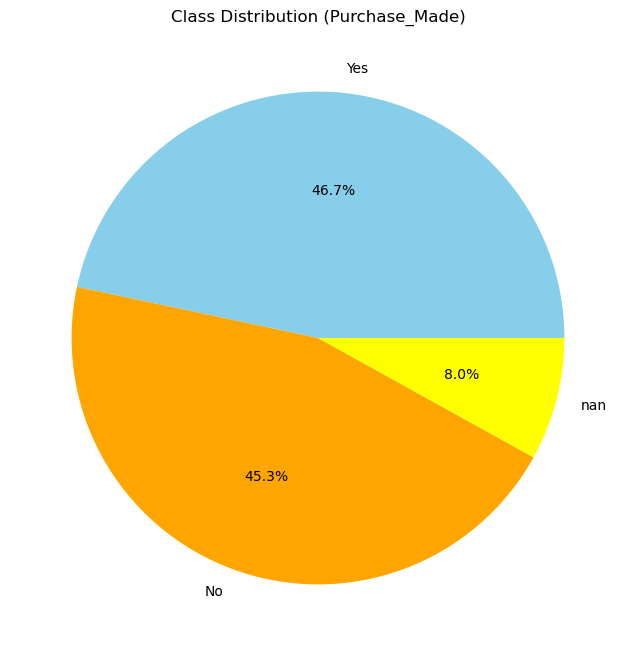

In [5]:


# Plot the distribution
# Pie chart for class distribution in 'Purchase_Made' column
purchase_counts = data['Purchase_Made'].value_counts(dropna=False)

# Plot the pie chart
purchase_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Display percentages on the chart
    colors=['skyblue', 'orange', 'yellow'],  # Custom colors
    title='Class Distribution (Purchase_Made)', 
    ylabel='',  # Remove the y-label for pie chart
    figsize=(8, 8)
)

plt.show()



Distribution of 'Group':
Group
Control      4300
Treatment    4299
Name: count, dtype: int64

Proportions:
Group
Control      0.500058
Treatment    0.499942
Name: count, dtype: float64


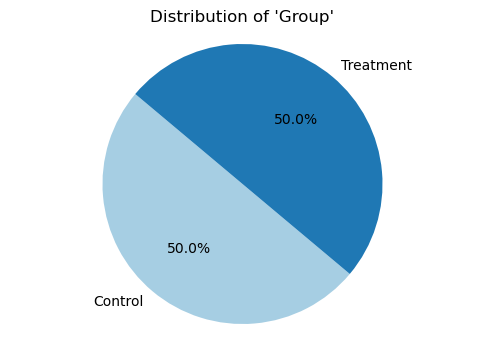

Distribution of 'Customer_Segment':
Customer_Segment
Low Value       2699
Medium Value    2697
High Value      2638
Name: count, dtype: int64

Proportions:
Customer_Segment
Low Value       0.335947
Medium Value    0.335698
High Value      0.328354
Name: count, dtype: float64


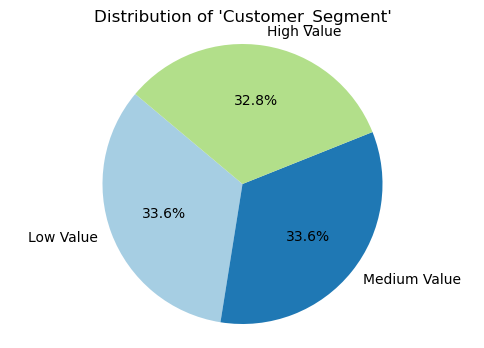

Distribution of 'Purchase_Made':
Purchase_Made
Yes    4667
No     4528
Name: count, dtype: int64

Proportions:
Purchase_Made
Yes    0.507558
No     0.492442
Name: count, dtype: float64


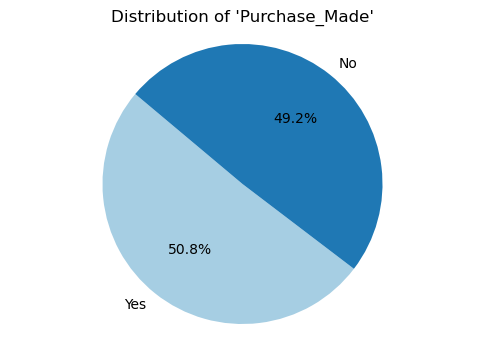

In [6]:
def check_balance_pie(column_name):
    print(f"Distribution of '{column_name}':")
    counts = data[column_name].value_counts()
    print(counts)
    print("\nProportions:")
    proportions = counts / counts.sum()
    print(proportions)
    # pie chart
    plt.figure(figsize=(6, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of '{column_name}'")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

check_balance_pie('Group')
check_balance_pie('Customer_Segment')
check_balance_pie('Purchase_Made')

In [7]:


# Function to calculate and plot statistics for numerical columns using a bar plot
def analyze_and_plot_numerical_columns(dataframe):
    print("Analysis of Numerical Columns:")
    
    # Create a figure for the plots
    plt.figure(figsize=(10, 6))

    # Loop through each numerical column in the dataframe
    for i, column in enumerate(dataframe.columns):
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Calculate statistics for the column
            mean_val = dataframe[column].mean()
            median_val = dataframe[column].median()
            variance_val = dataframe[column].var()
            std_dev_val = dataframe[column].std()

            # Print statistics
            print(f"\nStatistics for Column: {column}")
            print(f"Mean: {mean_val:.2f}")
            print(f"Median: {median_val:.2f}")
            print(f"Variance: {variance_val:.2f}")
            print(f"Standard Deviation: {std_dev_val:.2f}")
            print("-" * 40)

            # Plot the statistics as a bar plot for each numerical column
            bar_positions = [1, 2, 3, 4]  # Position of bars
            stats = [mean_val, median_val, variance_val, std_dev_val]  # Values to plot
            labels = ['Mean', 'Median', 'Variance', 'Standard Deviation']  # X-axis labels
            
            # Create bars for each column
            plt.bar(bar_positions, stats, width=0.4, label=column, alpha=0.6)

            # Add text labels for each bar
            for pos, value in zip(bar_positions, stats):
                plt.text(pos, value + 0.1, f'{value:.2f}', ha='center')0

    # Set up plot
    plt.title("Statistics for Numerical Columns")
    plt.xlabel("Statistic Type")
    plt.ylabel("Value")
    plt.xticks(bar_positions, labels)  # Set X-tick labels
    plt.legend(loc='upper left')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Call the function
analyze_and_plot_numerical_columns(data)


SyntaxError: invalid syntax (4069838398.py, line 35)

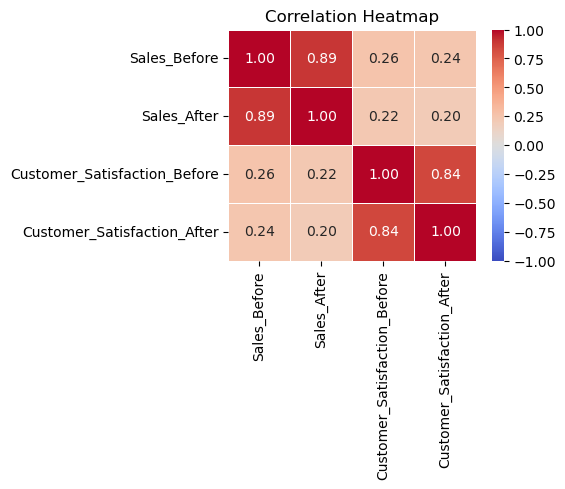

In [ ]:
def plot_correlation_heatmap(dataframe):
    # Select only numerical columns
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    # Calculate the correlation matrix for numerical columns
    corr_matrix = dataframe[numerical_columns].corr()

    # Plot the heatmap using seaborn
    plt.figure(figsize=(4, 3))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    
    # Set the title of the plot
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(data)

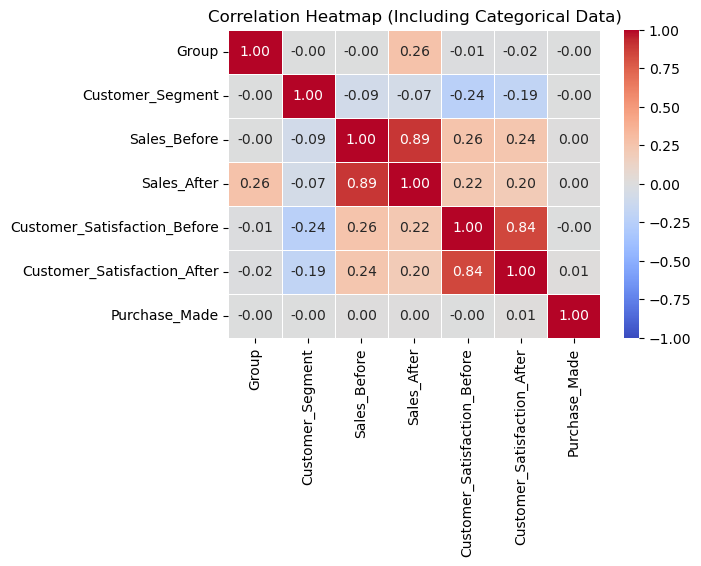

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataframe):
    le = LabelEncoder()  # Initialize the label encoder
    categorical_columns = dataframe.select_dtypes(include=['object']).columns  # Identify categorical columns
    
    for column in categorical_columns:
        dataframe[column] = le.fit_transform(dataframe[column])  # Apply label encoding
    
    return dataframe
df_encoded = encode_categorical_columns(data)


def plot_correlation_heatmap(dataframe):
    corr_matrix = dataframe.corr()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

    plt.title("Correlation Heatmap (Including Categorical Data)")
    plt.show()


plot_correlation_heatmap(df_encoded)


In [ ]:
from sklearn.preprocessing import LabelEncoder

categories = ['Low', 'Medium', 'High']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(categories)
print(encoded_labels)

[1 2 0]


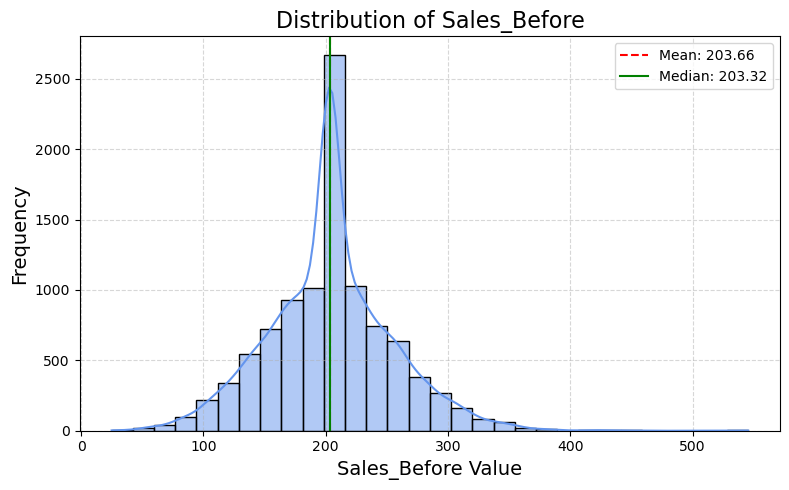

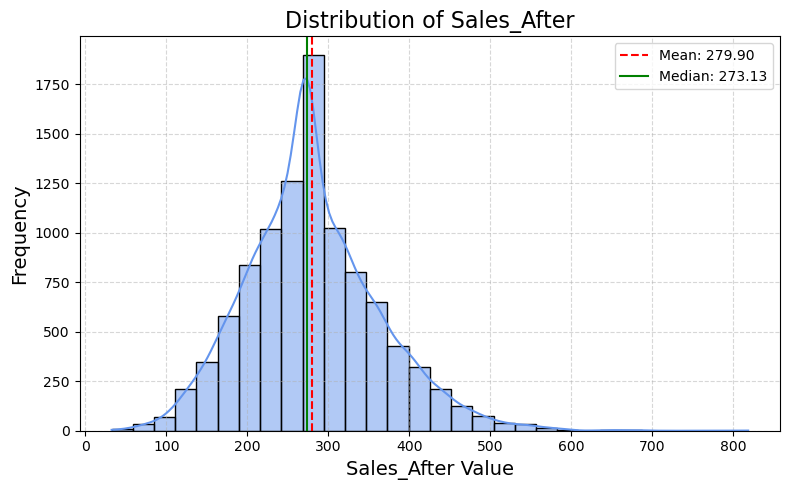

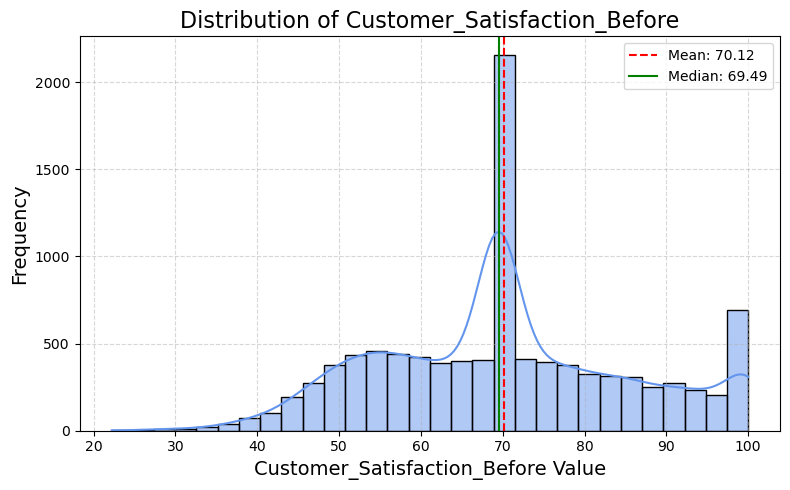

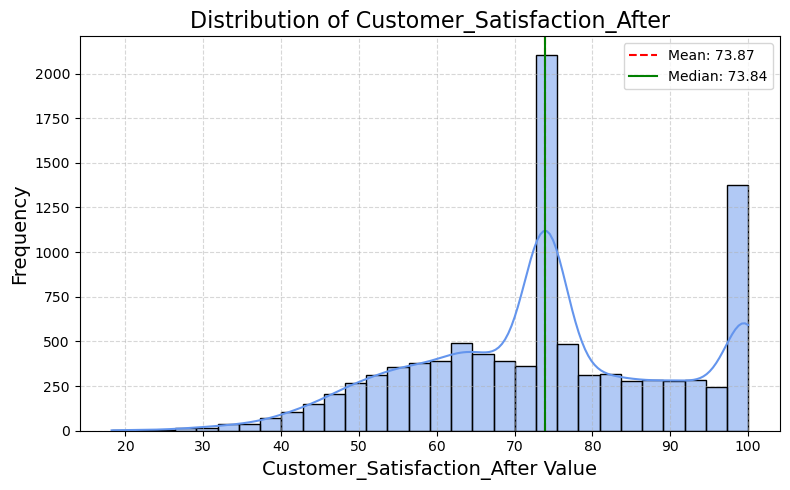


Range (Min and Max) for Each Numeric Column:
Sales_Before: Min = 24.85, Max = 545.42
Sales_After: Min = 32.41, Max = 818.22
Customer_Satisfaction_Before: Min = 22.20, Max = 100.00
Customer_Satisfaction_After: Min = 18.22, Max = 100.00


In [ ]:
numeric_columns = [
    "Sales_Before",
    "Sales_After",
    "Customer_Satisfaction_Before",
    "Customer_Satisfaction_After"
]

# Function to plot distribution and calculate range for each numeric column
def plot_distribution_and_range(dataframe, numeric_columns):
    # Create a dictionary to hold the range values
    column_ranges = {}

    for column in numeric_columns:
        # Plotting the distribution curve for the column
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[column], kde=True, color='cornflowerblue', bins=30)
        
        # Add vertical lines for mean and median for visual aid
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
        
        # Plot details
        plt.title(f"Distribution of {column}", fontsize=16)
        plt.xlabel(f"{column} Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(loc='upper right')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

        # Record the range (min and max) for each column
        column_ranges[column] = (dataframe[column].min(), dataframe[column].max())
    
    return column_ranges

# Call the function and get the range values for each numeric column
ranges = plot_distribution_and_range(data, numeric_columns)

# Display the range results
print("\nRange (Min and Max) for Each Numeric Column:")
for column, (min_value, max_value) in ranges.items():
    print(f"{column}: Min = {min_value:.2f}, Max = {max_value:.2f}")

In [ ]:

# Find number of missing values in each column
missing_values = data.isnull().sum()

# Find percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine and display nicely
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)


                              Missing Values  Missing Percentage (%)
Group                                   1401                   14.01
Customer_Segment                        1966                   19.66
Sales_Before                            1522                   15.22
Sales_After                              767                    7.67
Customer_Satisfaction_Before            1670                   16.70
Customer_Satisfaction_After             1640                   16.40
Purchase_Made                            805                    8.05


In [ ]:

# Returns the index positions where NaNs exist
nan_positions = np.argwhere(pd.isnull(data).values)

for pos in nan_positions:
    row_idx, col_idx = pos
    print(f"Missing value at Row {row_idx}, Column '{data.columns[col_idx]}'")


Missing value at Row 0, Column 'Customer_Satisfaction_After'
Missing value at Row 4, Column 'Group'
Missing value at Row 4, Column 'Sales_After'
Missing value at Row 5, Column 'Customer_Segment'
Missing value at Row 7, Column 'Purchase_Made'
Missing value at Row 8, Column 'Group'
Missing value at Row 10, Column 'Customer_Satisfaction_After'
Missing value at Row 11, Column 'Sales_Before'
Missing value at Row 11, Column 'Purchase_Made'
Missing value at Row 12, Column 'Customer_Segment'
Missing value at Row 12, Column 'Customer_Satisfaction_Before'
Missing value at Row 14, Column 'Group'
Missing value at Row 14, Column 'Customer_Satisfaction_After'
Missing value at Row 16, Column 'Customer_Segment'
Missing value at Row 16, Column 'Purchase_Made'
Missing value at Row 18, Column 'Customer_Segment'
Missing value at Row 18, Column 'Customer_Satisfaction_After'
Missing value at Row 20, Column 'Customer_Satisfaction_Before'
Missing value at Row 23, Column 'Customer_Satisfaction_Before'
Missing 

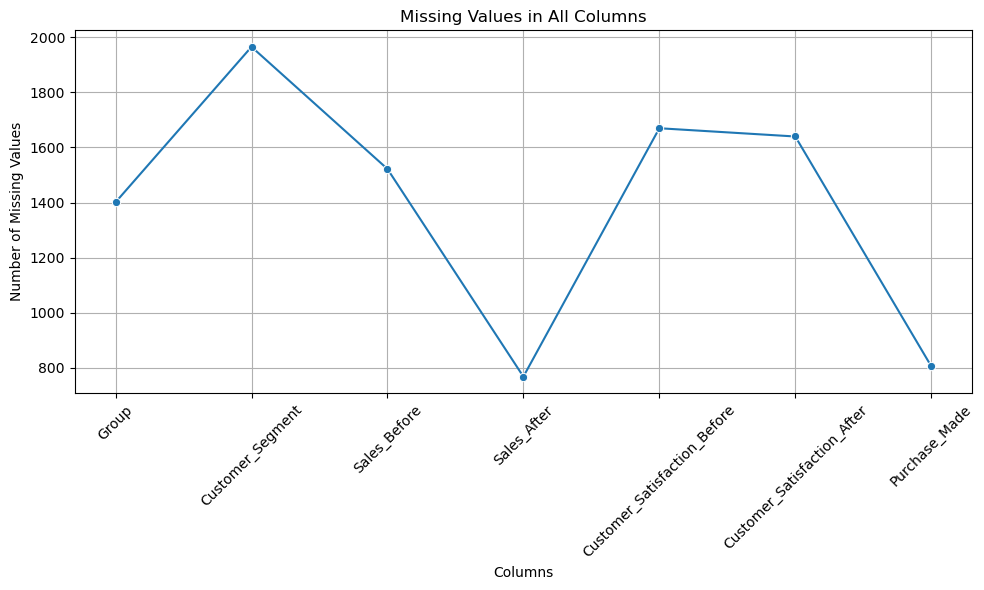

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Sales_with_NaNs_v1.3.csv")

# Calculate missing values for all columns
missing_counts = data.isnull().sum()

# Plot the missing values as a curve (line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x=missing_counts.index, y=missing_counts.values, marker='o')
plt.title("Missing Values in All Columns")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Define columns and their fill strategies
numeric_mean_cols = ['Sales_Before', 'Sales_After']
numeric_median_cols = ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
categorical_mode_cols = ['Group', 'Purchase_Made', 'Customer_Segment']

# Handle numeric columns (mean)
i = 0
while i < len(numeric_mean_cols):
    col = numeric_mean_cols[i]
    data[col] = data[col].fillna(data[col].mean())
    i += 1

# Handle numeric columns (median)
i = 0
while i < len(numeric_median_cols):
    col = numeric_median_cols[i]
    data[col] = data[col].fillna(data[col].median())
    i += 1

# Handle categorical columns (mode)
i = 0
while i < len(categorical_mode_cols):
    col = categorical_mode_cols[i]
    data[col] = data[col].fillna(data[col].mode()[0])
    i += 1


In [ ]:
# Find number of missing values in each column
missing_values = data.isnull().sum()

# Find percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine and display nicely
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                              Missing Values  Missing Percentage (%)
Group                                      0                     0.0
Customer_Segment                           0                     0.0
Sales_Before                               0                     0.0
Sales_After                                0                     0.0
Customer_Satisfaction_Before               0                     0.0
Customer_Satisfaction_After                0                     0.0
Purchase_Made                              0                     0.0


In [8]:

# Map binary categories
data['Group'] = data['Group'].map({'Control': 0, 'Treatment': 1})
data['Purchase_Made'] = data['Purchase_Made'].map({'No': 0, 'Yes': 1})

# Ordinal encoding for Customer_Segment
segment_order = {'Low Value': 0, 'Medium Value': 1, 'High Value': 2}
data['Customer_Segment'] = data['Customer_Segment'].map(segment_order)

In [9]:
print(data.head())

   Group  Customer_Segment  Sales_Before  Sales_After  \
0    0.0               2.0    240.548359   300.007568   
1    1.0               2.0    246.862114   381.337555   
2    0.0               2.0    156.978084   179.330464   
3    0.0               1.0    192.126708   229.278031   
4    NaN               2.0    229.685623          NaN   

   Customer_Satisfaction_Before  Customer_Satisfaction_After  Purchase_Made  
0                     74.684767                          NaN            0.0  
1                    100.000000                   100.000000            1.0  
2                     98.780735                   100.000000            0.0  
3                     49.333766                    39.811841            1.0  
4                     83.974852                    87.738591            1.0  
